# Lucia Depaoli
# 2016960

In [1]:
library(polyqtlR)
library(ggplot2)
library(GoFKernel)
library(BBmisc)
library(dplyr)
library(readr)
library(tidyverse)
library("lubridate")

Warning message:
"package 'polyqtlR' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'GoFKernel' was built under R version 3.6.3"Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009
Warning message:
"package 'BBmisc' was built under R version 3.6.3"
Attaching package: 'BBmisc'

The following object is masked from 'package:base':

    isFALSE

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:BBmisc':

    coalesce, collapse

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.1.0     v stringr 1.4.0
v tidyr

# Ex 1

### 1.1
Plot the function, given the interval $(a, b)$.

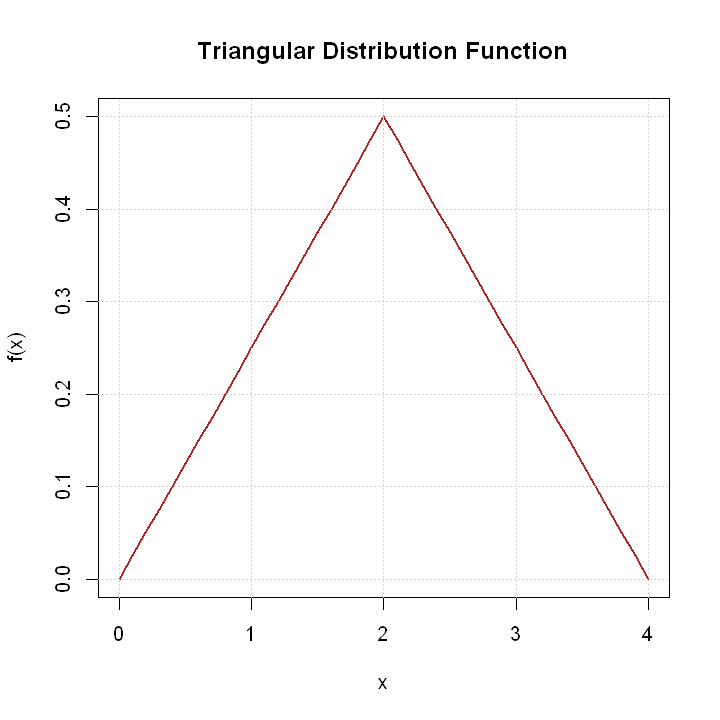

In [2]:
f <- function(x, a = 0, b = 4, c = 2) {
    ifelse(x >= a & x < c,
          2*(x-a)/((b-a)*(c-a)),
           
          ifelse(x >= c & x <= b,
                2*(b-x)/((b-a)*(b-c)),
                0))
}

x <- seq(0, 4, 0.1)

options(repr.plot.width = 6, repr.plot.height = 6)
plot(x, f(x, c = 2) , xlab="x" , ylab="f(x)", main='Triangular Distribution Function', col='firebrick', type='l', lwd=2)
grid()

### 1.2
Write an algorithm to generate random numbers from the triangular distribution.

In [3]:
F <- function(x, a = 0, b = 4, c = 2) {
    ifelse(x >= a & x < c,
          x^2/8,
           
          ifelse(x >= c & x <= b,
                x-x^2/8 -1 ,
                 
                ifelse(x < 0,
                      0,
                      1)
                ))
}

x <- seq(0, 4, 0.1)

# plot(x, F(x, c = 2) , xlab="x" , ylab="f(x)", main='Cumulative Triangular Distribution Function',
#      col='firebrick', type='l', lwd=2)

qdf <- Vectorize(inverse(F,lower=0, upper=4))

rdf <- function(x){
    return (qdf(runif(x)))
}

### 1.3
Generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve.

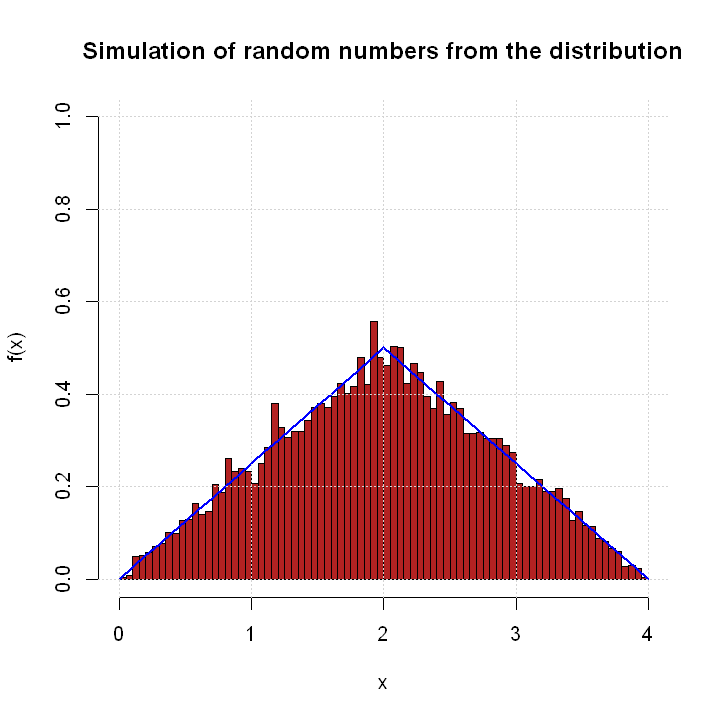

In [4]:
rand <- rdf(10^4)

hist(rand, breaks=100, ylim= c(0,1), xlim=c(0,4), col='firebrick', xlab="x", 
     ylab="f(x)", main="Simulation of random numbers from the distribution" , freq = FALSE)
lines(x, f(x), xlab="x" , ylab="f(x)",
     col='blue', type='l', lwd=2)
grid()

# Ex 2

### 2.1
Exponential function.

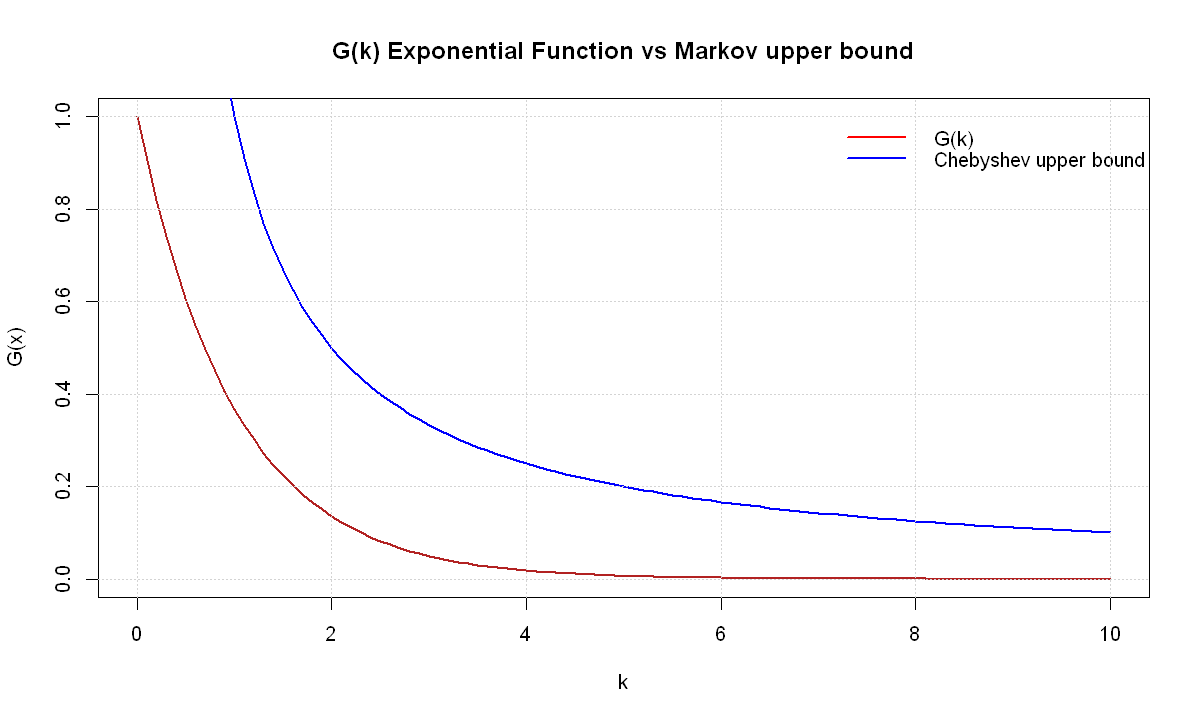

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6)

lambda <- 1
k <- seq(0, 10, 0.1)

plot(k, 1 - pexp(k,rate=lambda) , xlab="k" , ylab="G(x)", main='G(k) Exponential Function vs Markov upper bound',
     col='firebrick', type='l', lwd=2)
lines(k, 1/(lambda*k),
     col='blue', type='l', lwd=2)
legend(7,1, legend = c('G(k)','Chebyshev upper bound'),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2,
       bty = "n")
grid()

### 2.2
Uniform function.

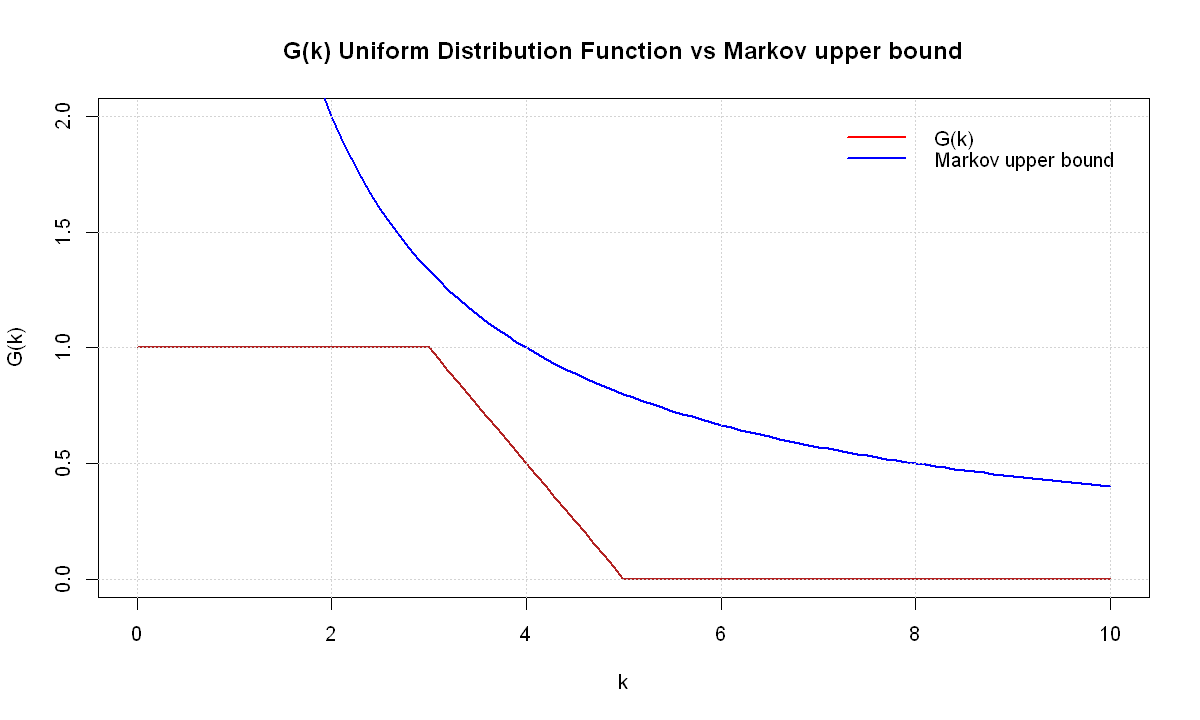

In [6]:
a <- 3
b <- 5
k <- seq(0,10,0.1)

plot(k, 1 - punif(k, a,b) , xlab="k" , ylab="G(k)", main='G(k) Uniform Distribution Function vs Markov upper bound',
     col='firebrick', type='l', lwd=2, ylim=c(0,2))
lines(k, (a+b)/(2*k), col='blue', type='l', lwd=2)
legend(7,2, legend = c('G(k)','Markov upper bound'),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2,
       bty = "n")
grid()

### 2.3
Binomial function.

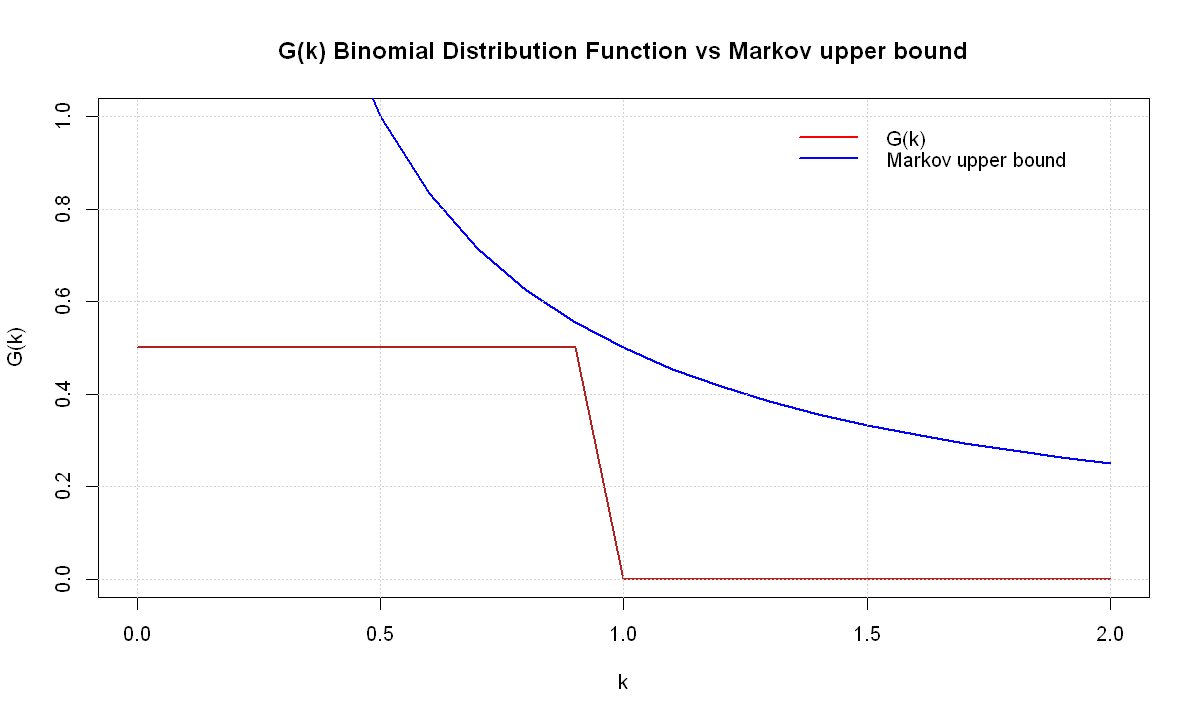

In [7]:
n <- 1
p <- 1/2
k <- seq(0,2,0.1)

plot(k, 1 - pbinom(k,n,p) , xlab="k" , ylab="G(k)", main='G(k) Binomial Distribution Function vs Markov upper bound',
     col='firebrick', type='l', lwd=2, ylim=c(0,1))
lines(k, n*p/k, col='blue', type='l', lwd=2)
legend(1.3,1, legend = c('G(k)','Markov upper bound'),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2, 
       bty = "n")
grid()

### 2.4
Poisson function.

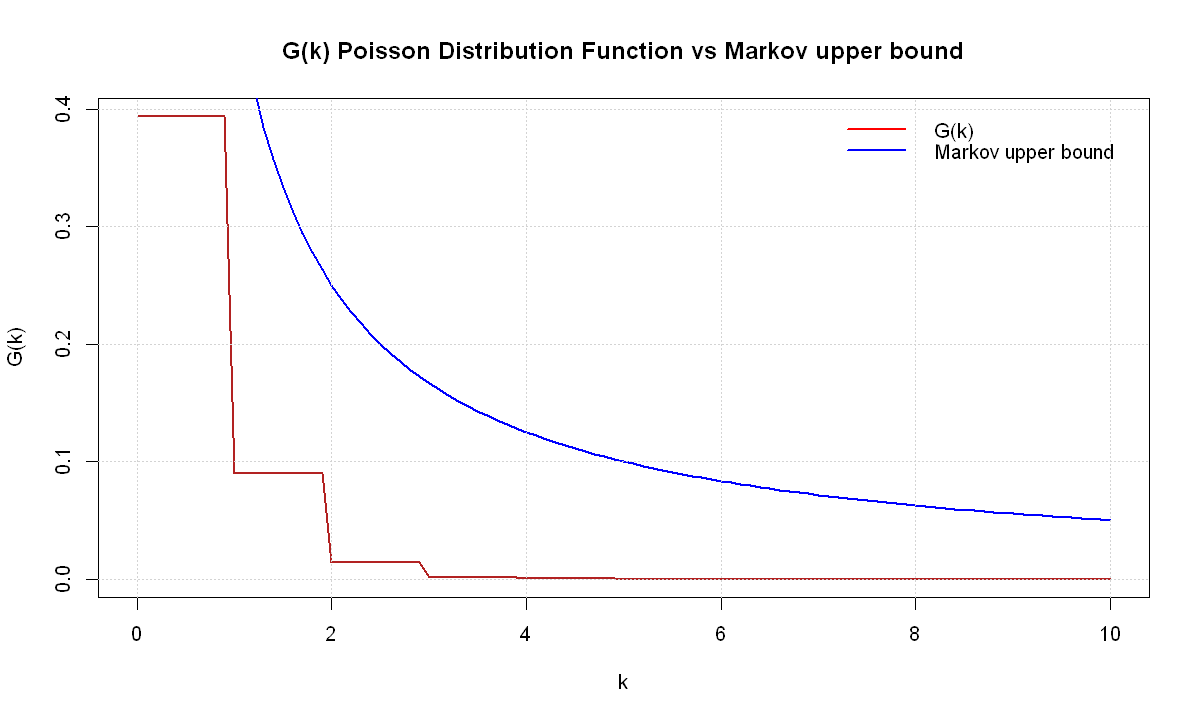

In [8]:
lambda <- 1/2
k <- seq(0,10,0.1)

plot(k, 1- ppois(k, lambda) , xlab="k" , ylab="G(k)", main='G(k) Poisson Distribution Function vs Markov upper bound',
     col='firebrick', type='l', lwd=2)
lines(k, lambda/k, col='blue', type='l', lwd=2)
legend(7,0.4, legend = c('G(k)','Markov upper bound'),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2,
       bty = "n")
grid()

# Ex 3

### 3.1
Normal distribution.

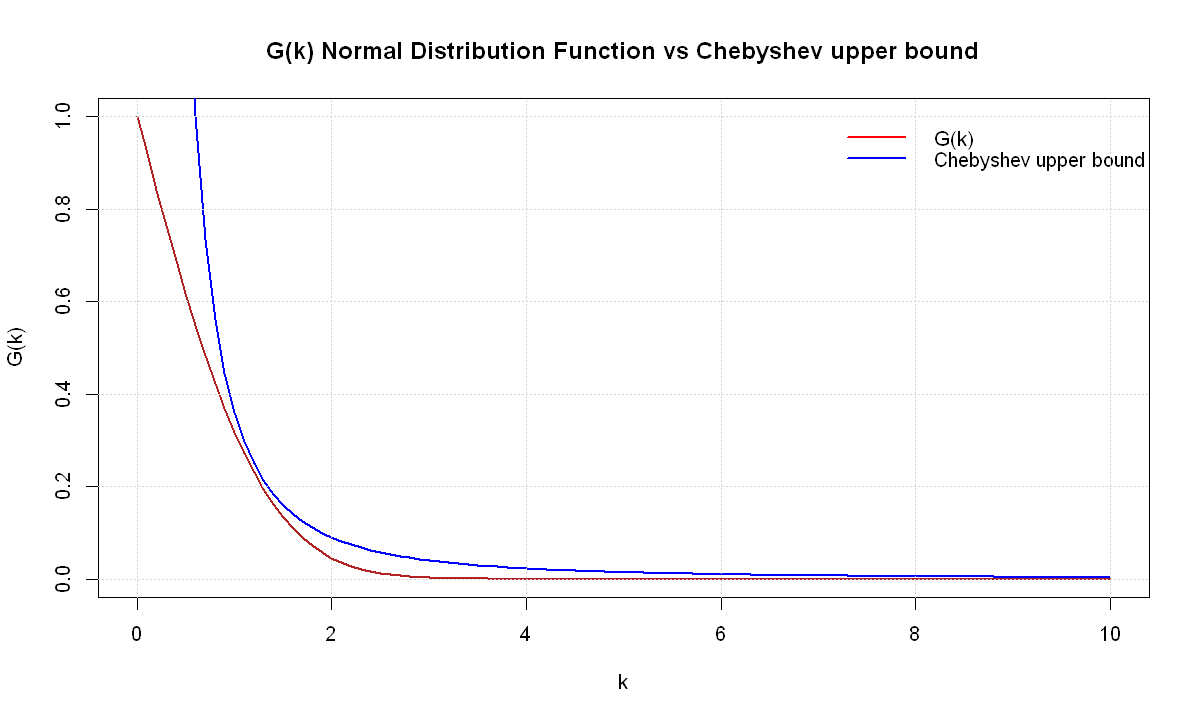

In [9]:
mu <- 3
sigma <- 5
k <- seq(0,10,0.1)

plot(k, 1 - pnorm(k*sigma+mu, mu,sigma) + pnorm(-k*sigma+mu, mu, sigma),
     xlab="k" , ylab="G(k)", main='G(k) Normal Distribution Function vs Chebyshev upper bound',
     col='firebrick', type='l', lwd=2)
lines(k, mu^2/(k^2*sigma^2), col='blue', type='l', lwd=2)
legend(7,1, legend = c('G(k)','Chebyshev upper bound'),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2,
       bty = "n")
grid()

### 3.2
Exponential distribution.

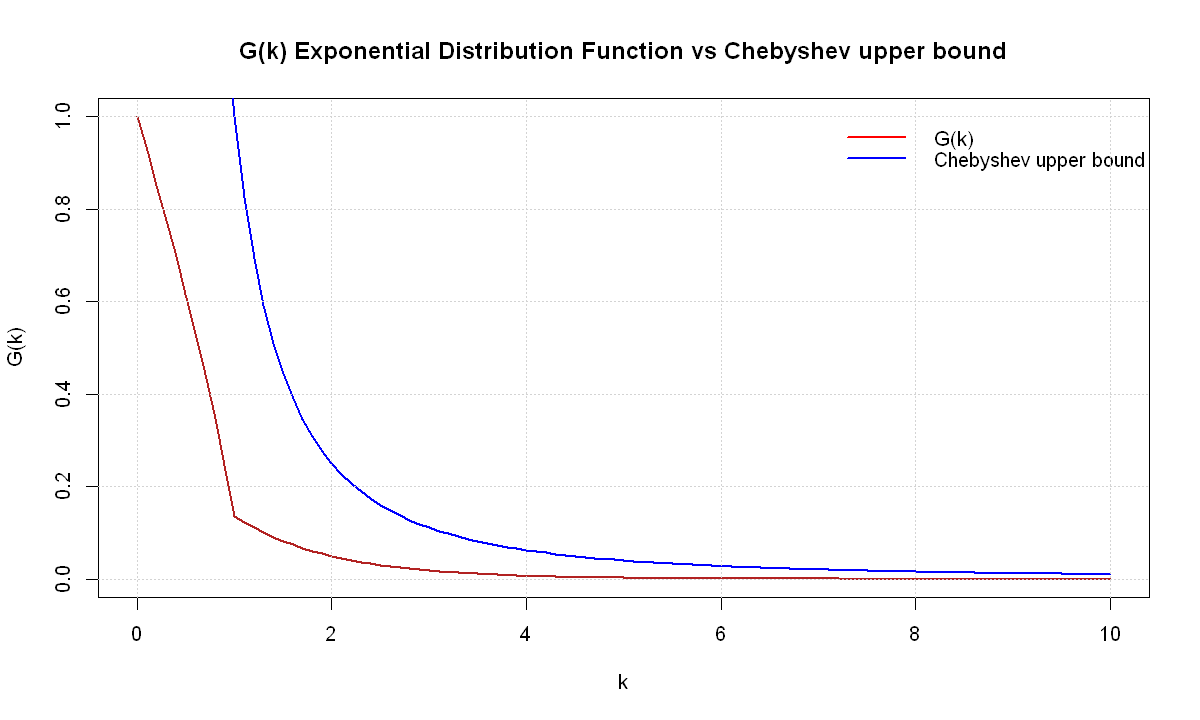

In [10]:
lambda <- 1
mu <- 1/lambda
sigma <- 1/lambda
k <- seq(0,10,0.1)

plot(k, 1 - pexp(k*sigma+mu, mu,sigma) + pexp(-k*sigma+mu, mu, sigma),
     xlab="k" , ylab="G(k)", main='G(k) Exponential Distribution Function vs Chebyshev upper bound',
     col='firebrick', type='l', lwd=2)
lines(k, mu^2/(k^2*sigma^2), col='blue', type='l', lwd=2)
legend(7,1, legend = c('G(k)','Chebyshev upper bound'),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2,
       bty = "n")
grid()

### 3.3
Uniform distribution.

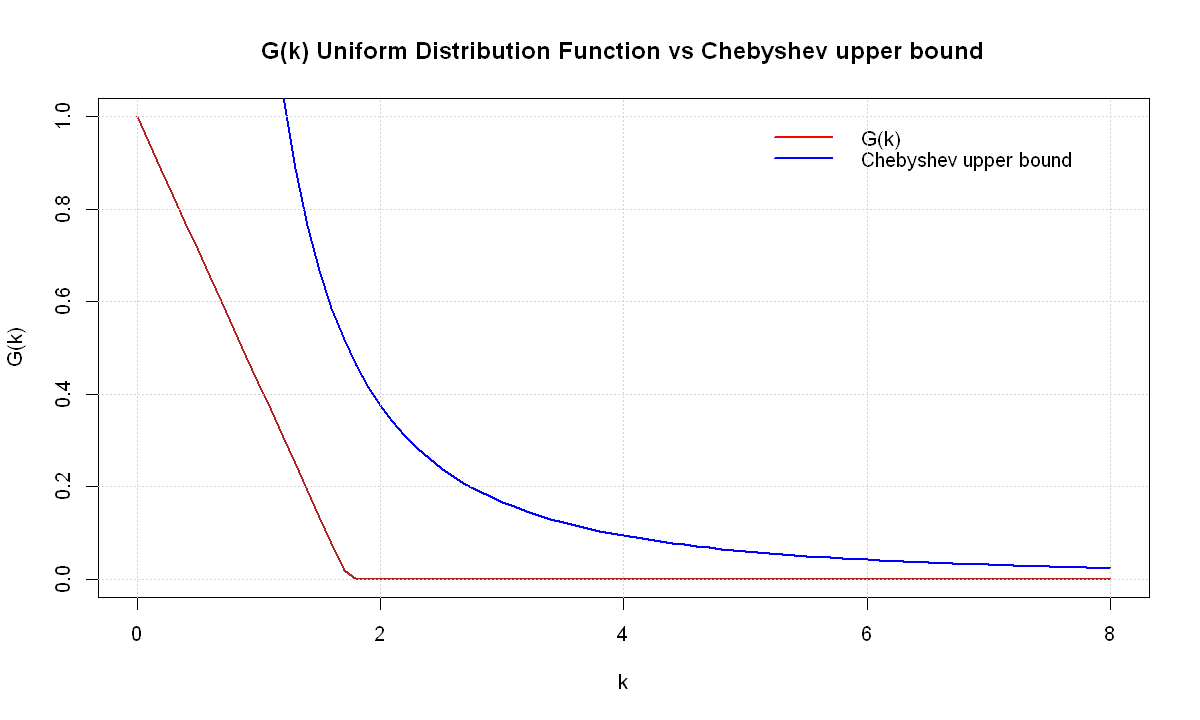

In [11]:
a <- 1-sqrt(2)
b <- 1+sqrt(2)
mu <- (a+b)/2
sigma <- (b-a)/sqrt(12)
k <- seq(0,8,0.1)

plot(k, 1 - punif(k*sigma+mu, a, b) + punif(-k*sigma+mu, a, b),
     xlab="k" , ylab="G(k)", main='G(k) Uniform Distribution Function vs Chebyshev upper bound',
     col='firebrick', type='l', lwd=2)
lines(k, mu^2/(k^2*sigma^2), col='blue', type='l', lwd=2)
legend(5,1, legend = c('G(k)','Chebyshev upper bound'),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2,
       bty = "n")
grid()

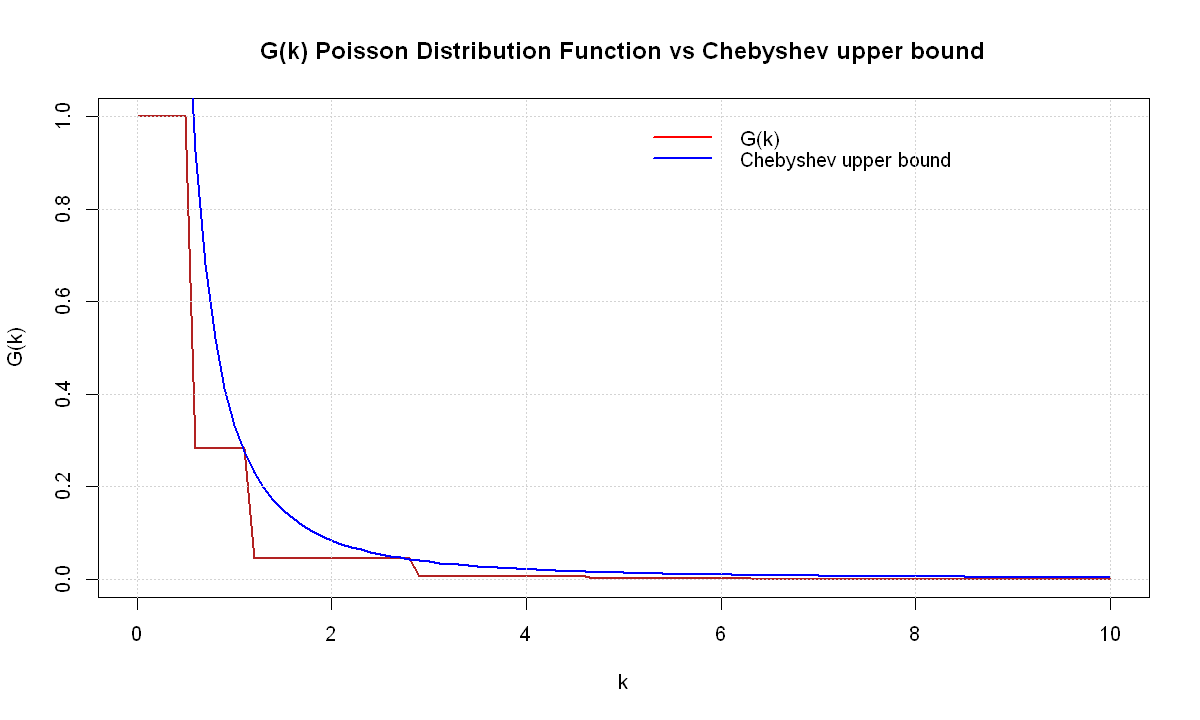

In [12]:
lambda <- 1/3
mu <- lambda
sigma <- sqrt(lambda) 
k <- seq(0,10,0.1)

plot(k, 1 - ppois(k*sigma+mu, mu) + ppois(-k*sigma+mu, mu),
     xlab="k" , ylab="G(k)", main='G(k) Poisson Distribution Function vs Chebyshev upper bound',
     col='firebrick', type='l', lwd=2)
lines(k, mu^2/(k^2*sigma^2), col='blue', type='l', lwd=2)
legend(5,1, legend = c('G(k)','Chebyshev upper bound'),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2,
       bty = "n")
grid()

# Ex 4

Compile this cell just to download the data.

In [ ]:
urlfile="https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
data_global <- read_csv(url(urlfile)) %>% as_tibble

filename <- "https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip"
dest_file <- 'data/Region_Mobility_Report_CSVs.zip'
download.file(filename, dest_file)
unzip("data/Region_Mobility_Report_CSVs.zip", list = FALSE, exdir = 'data/Region_Mobility_Report')
data_region <- read_csv(file = 'Global_mobility_report.csv') %>% as_tibble

I decided to study the data of Italy and France. I used the data in the Region_Mobility_Report, which are divided in 2 files (1 for 2020 and 1 for 2021).

In [13]:
data_italy2020 <- read_csv(file = 'data/Region_Mobility_Report/2020_IT_Region_Mobility_Report.csv') %>%
                            as_tibble %>% arrange(date)
data_italy2021 <- read_csv(file = 'data/Region_Mobility_Report/2021_IT_Region_Mobility_Report.csv') %>%
                            as_tibble %>% arrange(date)
data_italy2020$date <- as.Date(data_italy2020$date)
data_italy2021$date <- as.Date(data_italy2021$date)

Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)
Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_l

I deleted all the NA data.

In [14]:
data_italy2020 <- data_italy2020 %>% filter(!is.na(retail_and_recreation_percent_change_from_baseline)) %>%
             filter(!is.na(grocery_and_pharmacy_percent_change_from_baseline))%>%
             filter(!is.na(parks_percent_change_from_baseline))%>%
             filter(!is.na(transit_stations_percent_change_from_baseline))%>%
             filter(!is.na(workplaces_percent_change_from_baseline))%>%
             filter(!is.na(residential_percent_change_from_baseline))

data_italy2021 <- data_italy2021 %>% filter(!is.na(retail_and_recreation_percent_change_from_baseline)) %>%
             filter(!is.na(grocery_and_pharmacy_percent_change_from_baseline))%>%
             filter(!is.na(parks_percent_change_from_baseline))%>%
             filter(!is.na(transit_stations_percent_change_from_baseline))%>%
             filter(!is.na(workplaces_percent_change_from_baseline))%>%
             filter(!is.na(residential_percent_change_from_baseline))

Average of the observable over a period of one week.

In [15]:
data_italy2020a <- data_italy2020 %>% group_by(week = week(date)) %>%
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline),
          grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
          parks = mean(parks_percent_change_from_baseline),
          transit_stations = mean(transit_stations_percent_change_from_baseline),
          workplaces = mean(workplaces_percent_change_from_baseline),
          residential = mean(residential_percent_change_from_baseline))

data_italy2021a <- data_italy2021 %>% group_by(week = week(date) + 53) %>%
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline),
          grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
          parks = mean(parks_percent_change_from_baseline),
          transit_stations = mean(transit_stations_percent_change_from_baseline),
          workplaces = mean(workplaces_percent_change_from_baseline),
          residential = mean(residential_percent_change_from_baseline))

data_italya <- bind_rows(data_italy2020a, data_italy2021a)
data_italya$week <- lubridate::ymd( "2020-02-15" ) + lubridate::weeks(data_italya$week - 1)

Average of the observable over a period of one month.

In [16]:
data_italy2020b <- data_italy2020 %>% group_by(month = month(date)) %>%
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline),
          grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
          parks = mean(parks_percent_change_from_baseline),
          transit_stations = mean(transit_stations_percent_change_from_baseline),
          workplaces = mean(workplaces_percent_change_from_baseline),
          residential = mean(residential_percent_change_from_baseline))

data_italy2021b <- data_italy2021 %>% group_by(month = month(date) + 12) %>%
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline),
          grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
          parks = mean(parks_percent_change_from_baseline),
          transit_stations = mean(transit_stations_percent_change_from_baseline),
          workplaces = mean(workplaces_percent_change_from_baseline),
          residential = mean(residential_percent_change_from_baseline))

data_italyb <- bind_rows(data_italy2020b, data_italy2021b)
data_italyb$month <- lubridate::ymd( "2020-02-15" ) %m+% months(0:14)

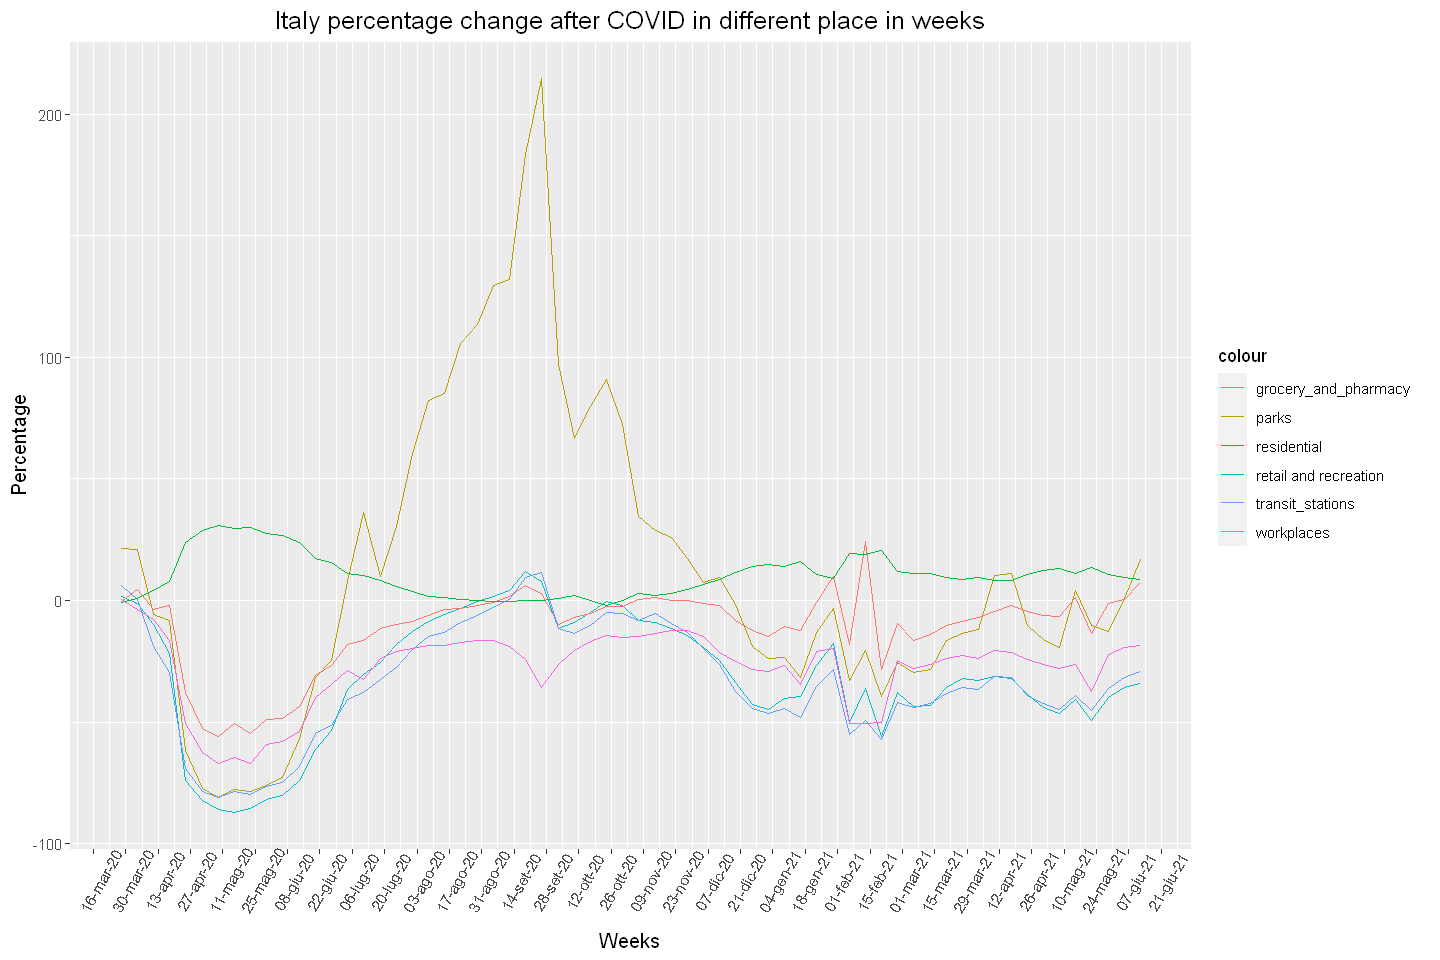

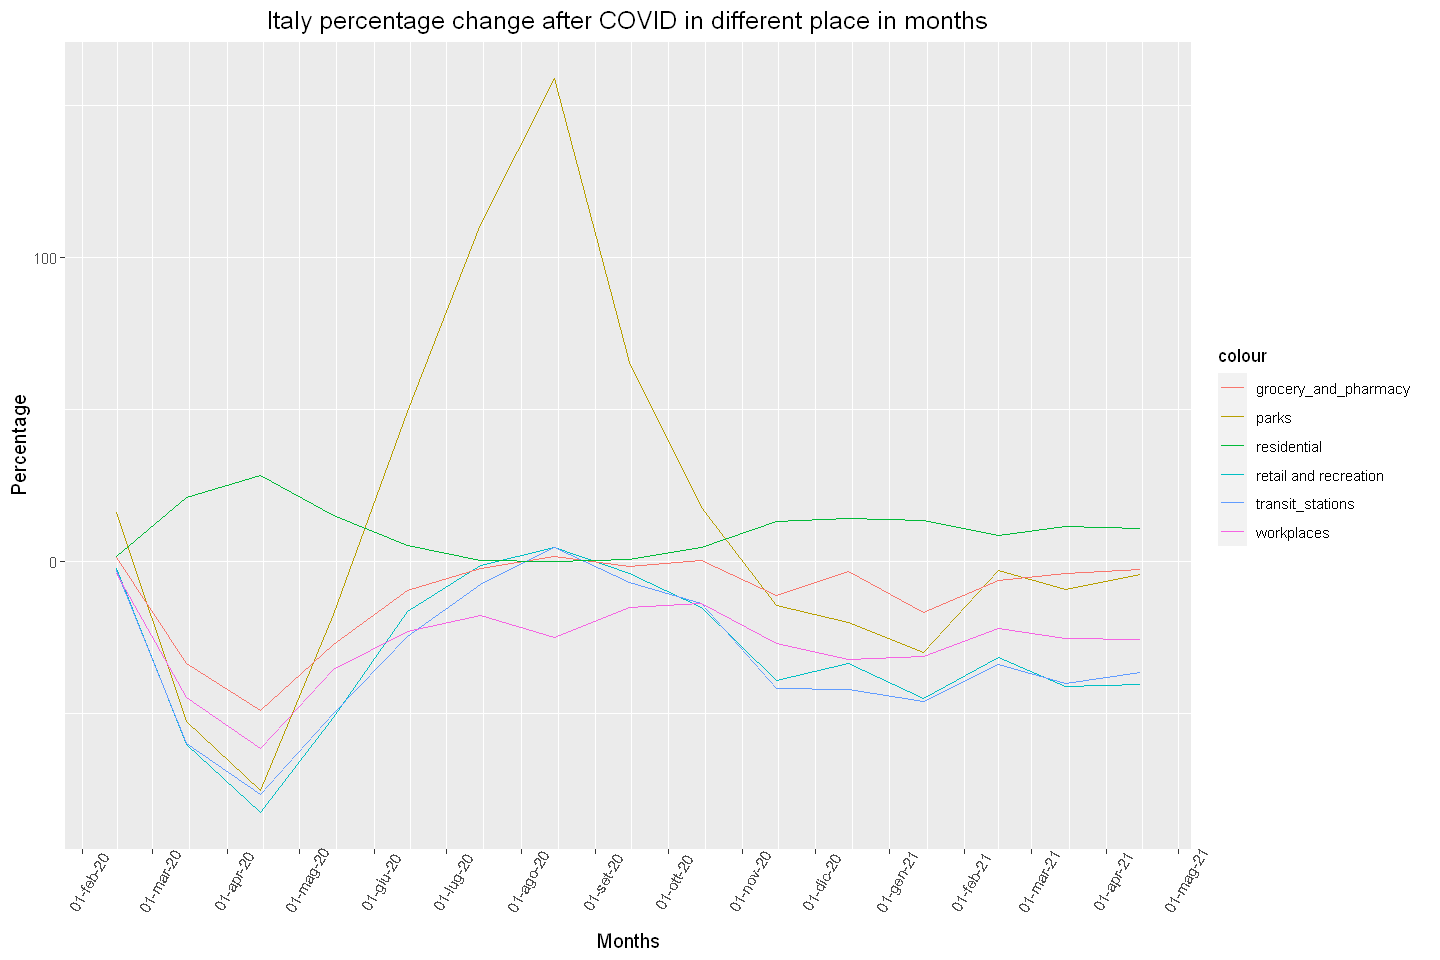

In [19]:
options(repr.plot.width=12, repr.plot.height=8)

ggplot(data=data_italya,aes(x=week, y = value), color=variable) +
scale_x_date(date_breaks = "2 week", date_labels = "%d-%b-%y") +
theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=0.3)) +
geom_line(aes(y=retail_and_recreation, col = "retail and recreation")) + 
  geom_line(aes(y=parks, col = "parks")) +
  geom_line(aes(y=grocery_and_pharmacy, col = "grocery_and_pharmacy")) + 
  geom_line(aes(y=transit_stations, col = "transit_stations")) + 
  geom_line(aes(y=workplaces, col = "workplaces")) +
  geom_line(aes(y=residential, col = "residential")) +
ggtitle("Italy percentage change after COVID in different place in weeks") +
labs(y='Percentage', x='Weeks') +
    theme(plot.title = element_text(hjust = 0.5, size=15), axis.text=element_text(size=9), 
          axis.title.x = element_text(size = 12), 
          axis.title.y = element_text(size = 12))

options(repr.plot.width=12, repr.plot.height=8)

ggplot(data=data_italyb,aes(x=month, y = value), color=variable) +
scale_x_date(date_breaks = "1 month", date_labels = "%d-%b-%y") +
theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=0.3)) +
geom_line(aes(y=retail_and_recreation, col = "retail and recreation")) + 
  geom_line(aes(y=parks, col = "parks")) +
  geom_line(aes(y=grocery_and_pharmacy, col = "grocery_and_pharmacy")) + 
  geom_line(aes(y=transit_stations, col = "transit_stations")) + 
  geom_line(aes(y=workplaces, col = "workplaces")) +
  geom_line(aes(y=residential, col = "residential")) +
ggtitle("Italy percentage change after COVID in different place in months") +
labs(y='Percentage', x='Months') +
    theme(plot.title = element_text(hjust = 0.5, size=15), axis.text=element_text(size=9), 
          axis.title.x = element_text(size = 12), 
          axis.title.y = element_text(size = 12))

In [20]:
data_france2020 <- read_csv(file = 'data/Region_Mobility_Report/2020_FR_Region_Mobility_Report.csv') %>%
as_tibble %>% arrange(date)
data_france2021 <- read_csv(file = 'data/Region_Mobility_Report/2021_FR_Region_Mobility_Report.csv') %>%
as_tibble %>% arrange(date)
data_france2020$date <- as.Date(data_france2020$date)
data_france2021$date <- as.Date(data_france2021$date)

Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)
Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_l

In [21]:
data_france2020 <- data_france2020 %>% filter(!is.na(retail_and_recreation_percent_change_from_baseline)) %>%
             filter(!is.na(grocery_and_pharmacy_percent_change_from_baseline))%>%
             filter(!is.na(parks_percent_change_from_baseline))%>%
             filter(!is.na(transit_stations_percent_change_from_baseline))%>%
             filter(!is.na(workplaces_percent_change_from_baseline))%>%
             filter(!is.na(residential_percent_change_from_baseline))

data_france2021 <- data_france2021 %>% filter(!is.na(retail_and_recreation_percent_change_from_baseline)) %>%
             filter(!is.na(grocery_and_pharmacy_percent_change_from_baseline))%>%
             filter(!is.na(parks_percent_change_from_baseline))%>%
             filter(!is.na(transit_stations_percent_change_from_baseline))%>%
             filter(!is.na(workplaces_percent_change_from_baseline))%>%
             filter(!is.na(residential_percent_change_from_baseline))

In [22]:
data_france2020a <- data_france2020 %>% group_by(week = week(date)) %>%
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline),
          grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
          parks = mean(parks_percent_change_from_baseline),
          transit_stations = mean(transit_stations_percent_change_from_baseline),
          workplaces = mean(workplaces_percent_change_from_baseline),
          residential = mean(residential_percent_change_from_baseline))

data_france2021a <- data_france2021 %>% group_by(week = week(date) + 53) %>%
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline),
          grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
          parks = mean(parks_percent_change_from_baseline),
          transit_stations = mean(transit_stations_percent_change_from_baseline),
          workplaces = mean(workplaces_percent_change_from_baseline),
          residential = mean(residential_percent_change_from_baseline))

data_francea <- bind_rows(data_france2020a, data_france2021a)
data_francea$week <- lubridate::ymd( "2020-02-15" ) + lubridate::weeks(data_francea$week - 1 )

In [23]:
data_france2020b <- data_france2020 %>% group_by(month = month(date)) %>%
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline),
          grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
          parks = mean(parks_percent_change_from_baseline),
          transit_stations = mean(transit_stations_percent_change_from_baseline),
          workplaces = mean(workplaces_percent_change_from_baseline),
          residential = mean(residential_percent_change_from_baseline))

data_france2021b <- data_france2021 %>% group_by(month = month(date) + 12) %>%
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline),
          grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
          parks = mean(parks_percent_change_from_baseline),
          transit_stations = mean(transit_stations_percent_change_from_baseline),
          workplaces = mean(workplaces_percent_change_from_baseline),
          residential = mean(residential_percent_change_from_baseline))

data_franceb <- bind_rows(data_france2020b, data_france2021b)
data_franceb$month <- lubridate::ymd( "2020-02-15" ) %m+% months(0:14)

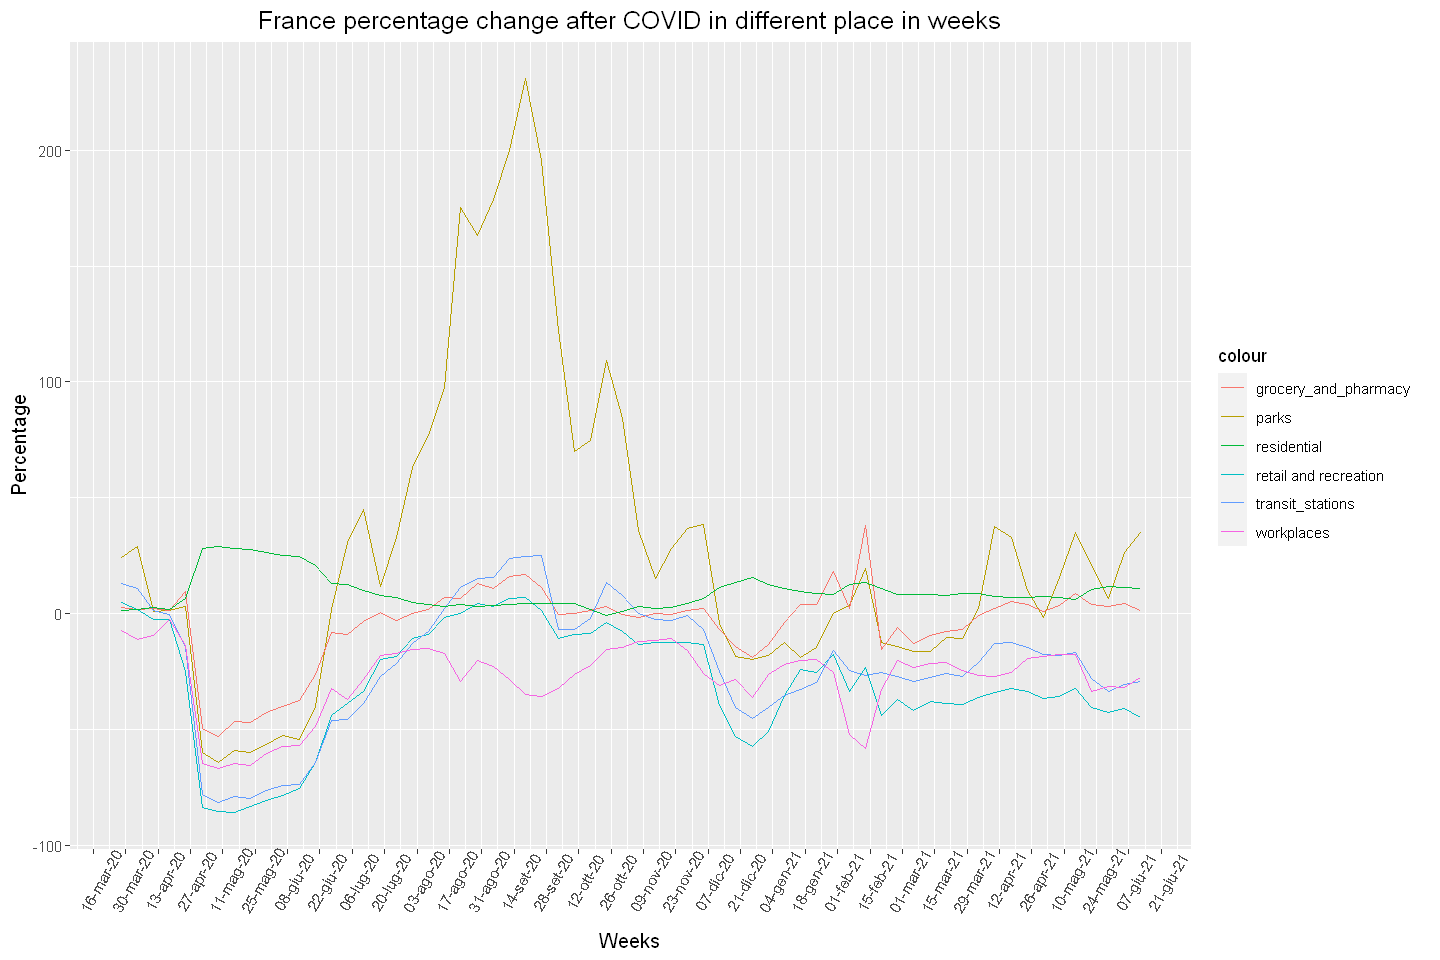

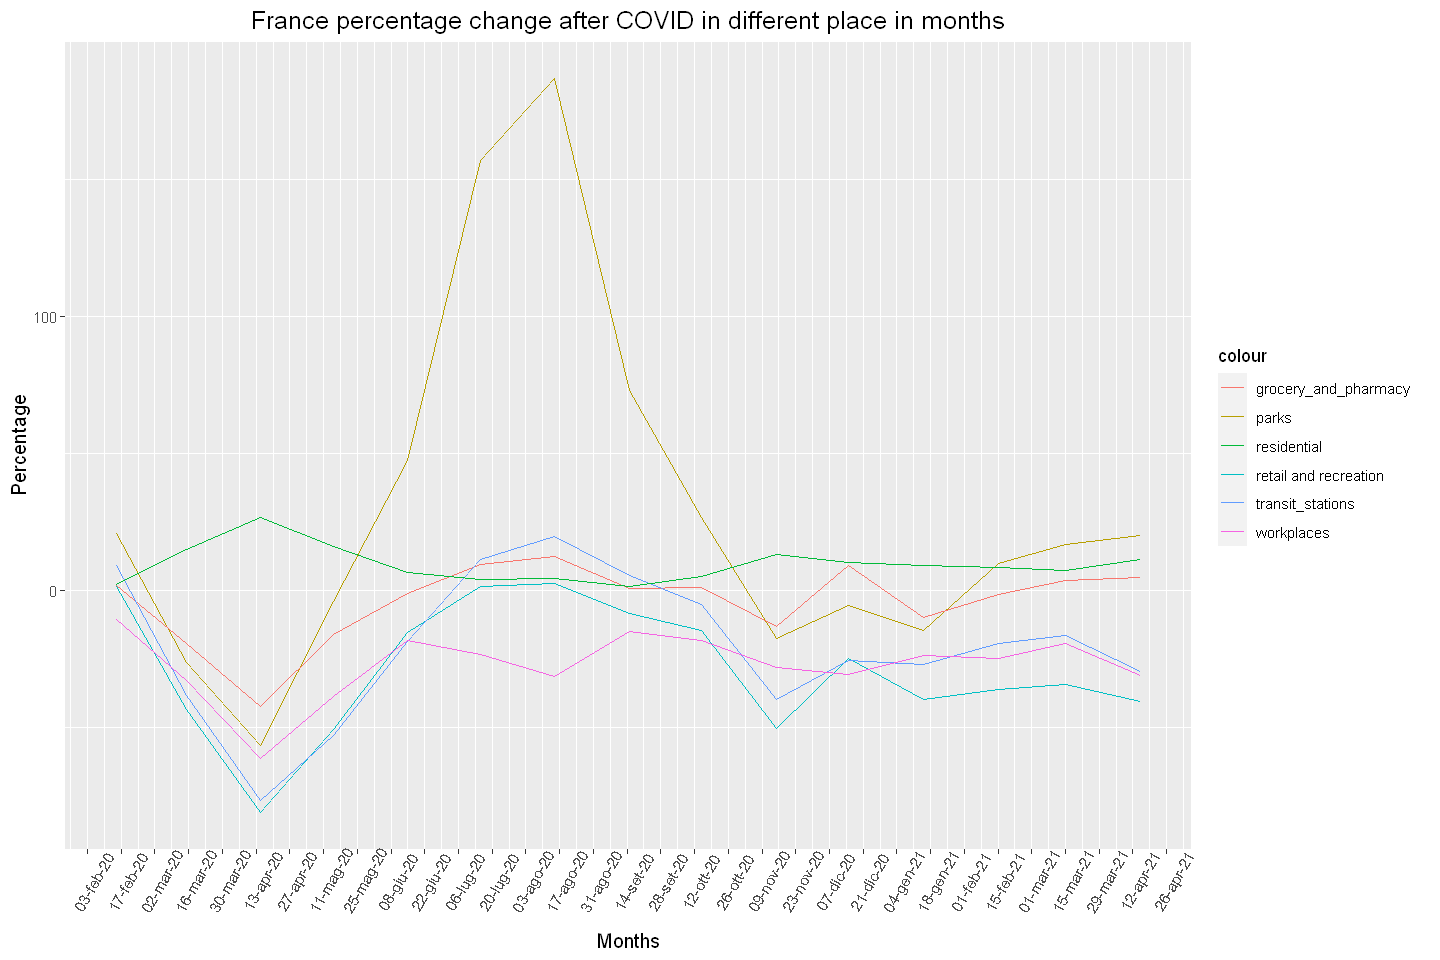

In [24]:
options(repr.plot.width=12, repr.plot.height=8)

ggplot(data=data_francea,aes(x=week, y = value), color=variable) +
scale_x_date(date_breaks = "2 week", date_labels = "%d-%b-%y") +
theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=0.3)) +
geom_line(aes(y=retail_and_recreation, col = "retail and recreation")) + 
  geom_line(aes(y=parks, col = "parks")) +
  geom_line(aes(y=grocery_and_pharmacy, col = "grocery_and_pharmacy")) + 
  geom_line(aes(y=transit_stations, col = "transit_stations")) + 
  geom_line(aes(y=workplaces, col = "workplaces")) +
  geom_line(aes(y=residential, col = "residential")) +
ggtitle("France percentage change after COVID in different place in weeks") +
labs(y='Percentage', x='Weeks') +
    theme(plot.title = element_text(hjust = 0.5, size=15), axis.text=element_text(size=9), 
          axis.title.x = element_text(size = 12), 
          axis.title.y = element_text(size = 12))

options(repr.plot.width=12, repr.plot.height=8)

ggplot(data=data_franceb,aes(x=month, y = value), color=variable) +
scale_x_date(date_breaks = "2 week", date_labels = "%d-%b-%y") +
theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=0.3)) +
geom_line(aes(y=retail_and_recreation, col = "retail and recreation")) + 
  geom_line(aes(y=parks, col = "parks")) +
  geom_line(aes(y=grocery_and_pharmacy, col = "grocery_and_pharmacy")) + 
  geom_line(aes(y=transit_stations, col = "transit_stations")) + 
  geom_line(aes(y=workplaces, col = "workplaces")) +
  geom_line(aes(y=residential, col = "residential")) +
ggtitle("France percentage change after COVID in different place in months") +
labs(y='Percentage', x='Months') +
    theme(plot.title = element_text(hjust = 0.5, size=15), axis.text=element_text(size=9), 
          axis.title.x = element_text(size = 12), 
          axis.title.y = element_text(size = 12))